In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px


# Specify the data types for the columns
dtypes = {
    'INC NUMBER': 'str',
    'OCCURRED ON': 'str',
    'OCCURRED TO': 'str',
    'UCR CRIME CATEGORY': 'str',
    '100 BLOCK ADDR': 'str',
    'ZIP': 'float',
    'PREMISE TYPE': 'str',
    'GRID': 'str'
}

# Read the CSV file with specified data types
crime_data = pd.read_csv('./Resources/Crime-data.csv', dtype=dtypes)

# Drop rows with missing 'ZIP' values
crime_data = crime_data.dropna(subset=['ZIP'])

# Remove decimal points from the 'ZIP' column
crime_data['ZIP'] = crime_data['ZIP'].astype(int)



In [45]:
#check premise types and counts
premise_type_counts = crime_data['PREMISE TYPE'].value_counts()
print(premise_type_counts)

# Calculate percentages
premise_type_percentages = premise_type_counts / premise_type_counts.sum() * 100

# Identify categories below 5%
categories_below_5 = premise_type_percentages[premise_type_percentages < 5].index

#Group categories below 5% into "Other"
premise_type_counts_grouped = premise_type_counts.copy()
premise_type_counts_grouped['OTHER(BELOW 5%)'] = premise_type_counts_grouped[categories_below_5].sum()
premise_type_counts_grouped = premise_type_counts_grouped.drop(categories_below_5)
premise_type_counts_grouped = premise_type_counts_grouped.drop(labels=['OTHER(BELOW 5%)'])
crime_data_filtered = crime_data[crime_data['PREMISE TYPE'].isin(premise_type_counts_grouped.index)]
num_categories = len(premise_type_counts_grouped)


PREMISE TYPE
SINGLE FAMILY HOUSE            81608
APARTMENT                      78114
PARKING LOT                    47034
STREET / ROADWAY / SIDEWALK    36032
DEPARTMENT / DISCOUNT STORE    29177
                               ...  
REST AREA                         16
STOREROOM / SHED                  14
LAKE / WATERWAY / BEACH            9
TRIBAL LANDS                       7
MILITARY INSTALLATION              6
Name: count, Length: 98, dtype: int64


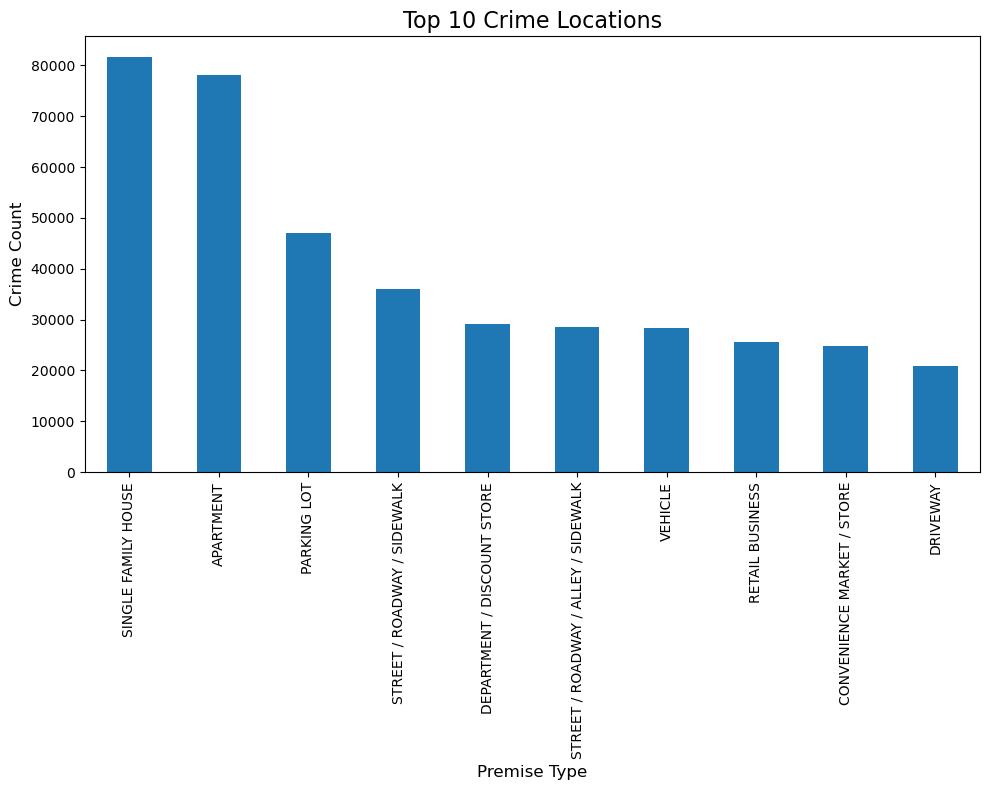

In [46]:
top_locations = crime_data['PREMISE TYPE'].value_counts().head(10)
top_locations.plot(kind='bar', figsize=(10, 8))

plt.title('Top 10 Crime Locations', fontsize=16)
plt.xlabel('Premise Type', fontsize=12)
plt.ylabel('Crime Count', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('Resources/image-output/Top_10_location.png')
plt.show()


In [47]:
top_locations = crime_data['PREMISE TYPE']
top_crimes = crime_data['UCR CRIME CATEGORY'].value_counts().head(10)
top_crimes = crime_data['UCR CRIME CATEGORY']

combined_df = pd.DataFrame({'Top Locations': (top_locations), 'Top Crimes': (top_crimes)})

combined_df


,Top Locations,Top Crimes
0,HOSPITAL,RAPE
1,SINGLE FAMILY HOUSE,LARCENY-THEFT
2,PARKING LOT,LARCENY-THEFT
3,PARKING LOT,LARCENY-THEFT
4,SINGLE FAMILY HOUSE,MOTOR VEHICLE THEFT
...,...,...
575762,FAST FOOD STORE,BURGLARY
575763,STREET / ROADWAY / SIDEWALK,MOTOR VEHICLE THEFT
575764,CONVENIENCE MARKET / STORE,LARCENY-THEFT
575765,SINGLE FAMILY HOUSE,LARCENY-THEFT


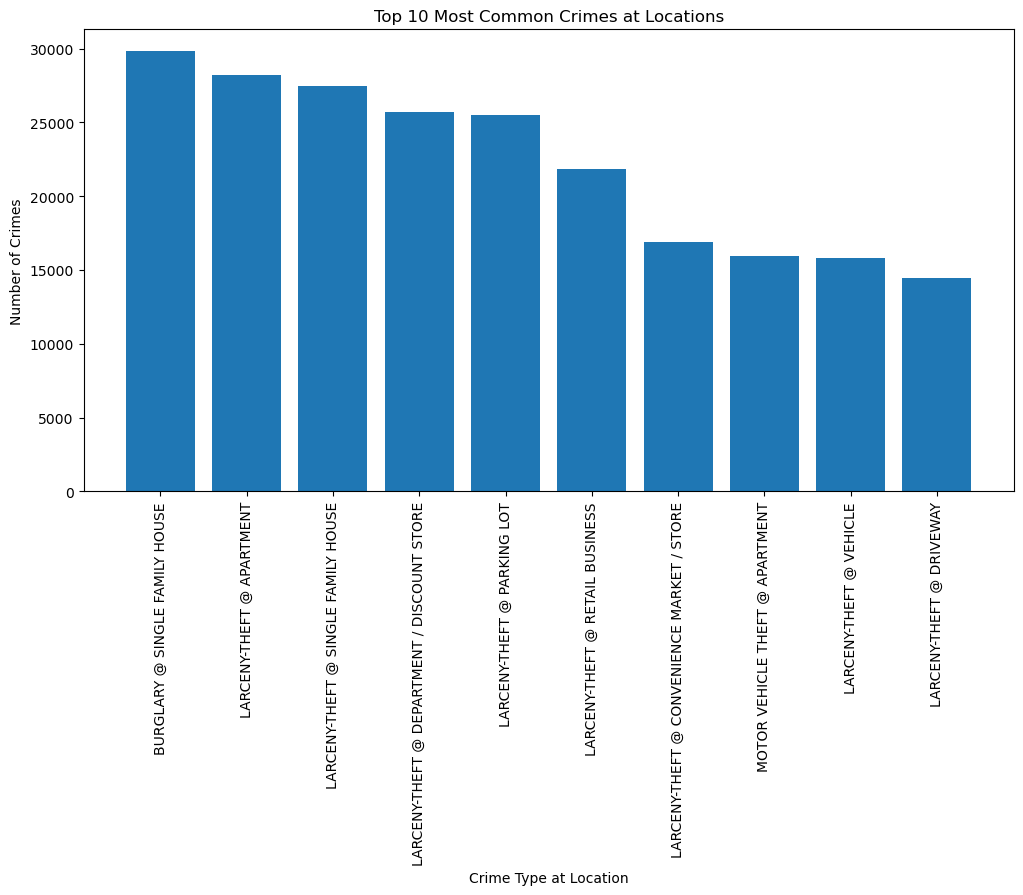

In [48]:
grouped_crime=combined_df.groupby(['Top Locations', 'Top Crimes']).size().reset_index(name='Count')
top_10_crime_location_pairs= grouped_crime.sort_values(by='Count', ascending=False).head(10)
labels = []
for index, row in top_10_crime_location_pairs.iterrows():
    labels.append(f"{row['Top Crimes']} @ {row['Top Locations']}")

plt.figure(figsize=(12, 6))
plt.bar(labels, top_10_crime_location_pairs['Count'])
plt.xlabel("Crime Type at Location")
plt.ylabel("Number of Crimes")
plt.title("Top 10 Most Common Crimes at Locations")
plt.xticks(rotation=90)  
plt.savefig('Resources/image-output/common_location_and_crimes.png')
plt.show()

In [49]:
crime_data['OCCURRED TO']=pd.to_datetime(crime_data['OCCURRED TO'])


In [50]:
start_year = 2015
end_year= 2024
crime_data_1 = crime_data[(crime_data['OCCURRED TO'].dt.year >= start_year) & (crime_data['OCCURRED TO'].dt.year<= end_year)]
crime_data_1['Year'] = crime_data['OCCURRED TO'].dt.year
crime_count_by_year = crime_data_1.groupby('Year').size()
print(crime_count_by_year)


Year
2015.0     7305
2016.0    44785
2017.0    46355
2018.0    45477
2019.0    44697
2020.0    39482
2021.0    37703
2022.0    37217
2023.0    33098
2024.0    30651
dtype: int64


/var/folders/xw/_nqnx8px1mn05gf4fw_qmy7h0000gn/T/ipykernel_4418/2973193609.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



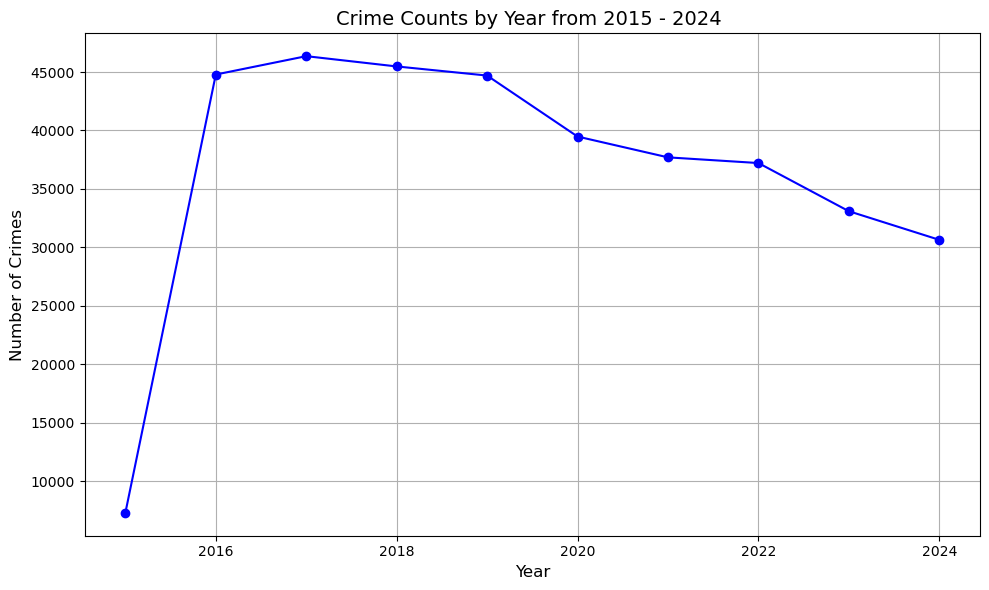

In [51]:
crime_count_by_year.plot(kind='line', marker='o', color='b', figsize=(10, 6))


plt.title('Crime Counts by Year from 2015 - 2024 ', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Crimes', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig('Resources/image-output/crime_counts_by_year.png')
plt.show()

In [52]:
crime_data['OCCURRED TO']=pd.to_datetime(crime_data['OCCURRED TO'])
crime_data['OCCURRED TO']=crime_data['OCCURRED TO'].dt.strftime('%H:%m')
crime_data = crime_data.dropna(subset=['OCCURRED TO'])


In [53]:
crime_time=crime_data.groupby(['UCR CRIME CATEGORY','OCCURRED TO']).size().reset_index(name='Count')
#Most common time for each type of crime
most_commmon_times=crime_time.loc[crime_time.groupby('UCR CRIME CATEGORY')['Count'].idxmax()]
most_commmon_times

,UCR CRIME CATEGORY,OCCURRED TO,Count
7,AGGRAVATED ASSAULT,00:08,164
331,ARSON,03:08,18
670,BURGLARY,07:11,338
1056,DRUG OFFENSE,16:01,164
1236,LARCENY-THEFT,07:01,1215
1534,MOTOR VEHICLE THEFT,07:11,467
1739,MURDER AND NON-NEGLIGENT MANSLAUGHTER,00:12,12
2007,RAPE,00:12,144
2512,ROBBERY,19:01,76


In [54]:
time_counts=most_commmon_times.value_counts()
time_counts

UCR CRIME CATEGORY                     OCCURRED TO  Count
AGGRAVATED ASSAULT                     00:08        164      1
ARSON                                  03:08        18       1
BURGLARY                               07:11        338      1
DRUG OFFENSE                           16:01        164      1
LARCENY-THEFT                          07:01        1215     1
MOTOR VEHICLE THEFT                    07:11        467      1
MURDER AND NON-NEGLIGENT MANSLAUGHTER  00:12        12       1
RAPE                                   00:12        144      1
ROBBERY                                19:01        76       1
Name: count, dtype: int64

In [55]:
most_commmon_times['OCCURRED TO'] = pd.to_datetime(most_commmon_times['OCCURRED TO'], format='%H:%M')
most_commmon_times['Time'] = most_commmon_times['OCCURRED TO'].dt.strftime('%H:%M')
time_counts = most_commmon_times.groupby('Time')['Count'].sum()

most_common_time = time_counts.idxmax()  #  time with the max
most_common_time_count = time_counts.max()  # sum of counts for that time

print(f"The most common time for crimes to occur is {most_common_time} with {most_common_time_count} total occurrences.")


The most common time for crimes to occur is 07:01 with 1215 total occurrences.


In [56]:
crime_data['OCCURRED TO'] = pd.to_datetime(crime_data['OCCURRED TO'], errors='coerce')
crime_data['hour'] =crime_data['OCCURRED TO'].dt.hour
hourly_counts=crime_data['hour'].value_counts().sort_index()
hourly_counts

/var/folders/xw/_nqnx8px1mn05gf4fw_qmy7h0000gn/T/ipykernel_4418/2610977953.py:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



hour
0     18538
1      7040
2      7190
3      7939
4     10085
5     14715
6     20494
7     22685
8     21317
9     18426
10    17896
11    16121
12    18358
13    16254
14    17698
15    18926
16    18411
17    17989
18    16067
19    14055
20    13190
21    11360
22     9647
23    13612
Name: count, dtype: int64

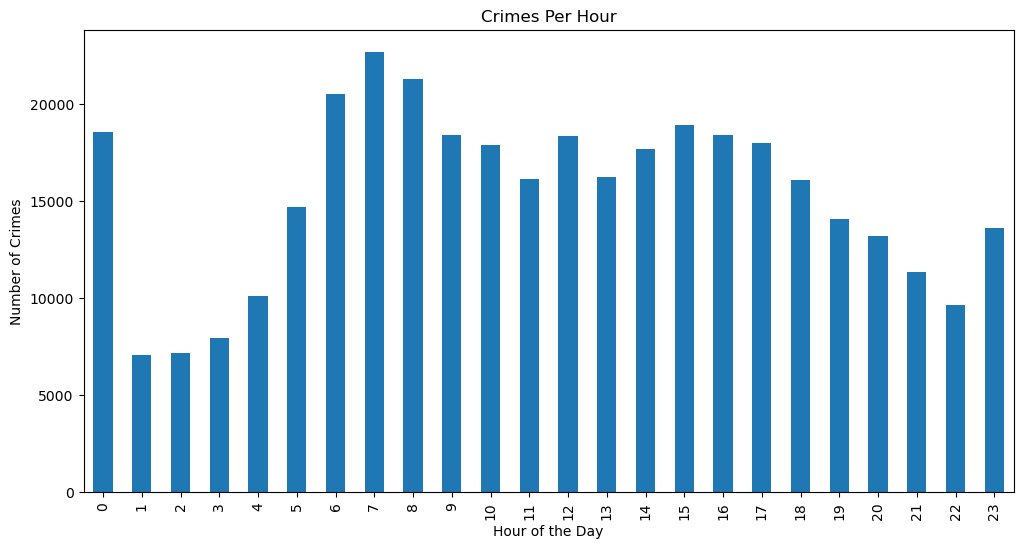

In [57]:
plt.figure(figsize=(12, 6))
hourly_counts.plot(kind="bar")  
plt.xlabel("Hour of the Day")  
plt.ylabel("Number of Crimes")  
plt.title("Crimes Per Hour")  
plt.savefig('Resources/image-output/crimes_per_hour.png')
plt.show()

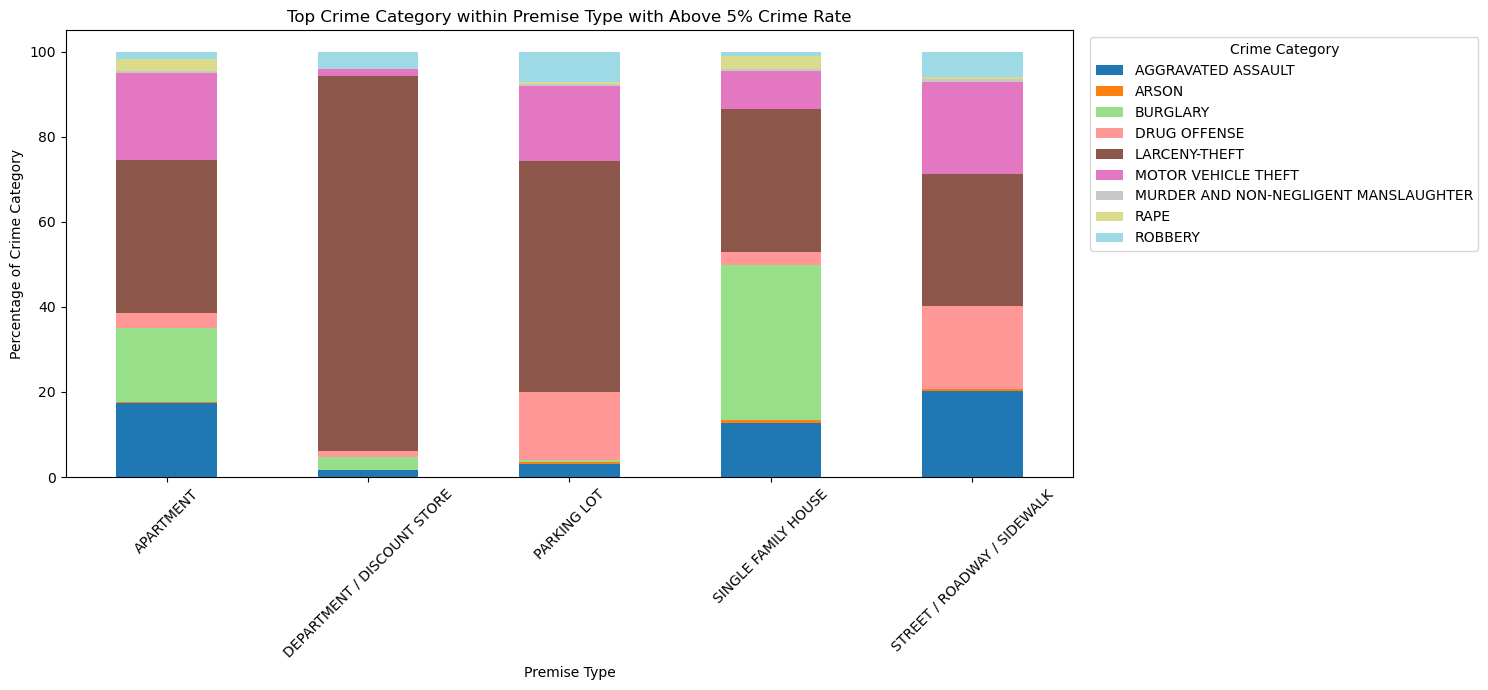

In [58]:
premise_crime_summary = crime_data_filtered.groupby('PREMISE TYPE')['UCR CRIME CATEGORY'].value_counts().unstack(fill_value=0)

# Calculate total crime counts for each premise type
total_crime_per_premise = premise_crime_summary.sum(axis=1)

# Calculate percentages for each crime category
for col in premise_crime_summary.columns:
    premise_crime_summary[col] = (premise_crime_summary[col] / total_crime_per_premise) * 100

# Plot the stacked bar chart using the filtered data
premise_crime_summary.plot(kind='bar', stacked=True, figsize=(15, 7), colormap='tab20')
plt.xlabel('Premise Type')
plt.ylabel('Percentage of Crime Category')
plt.title('Top Crime Category within Premise Type with Above 5% Crime Rate')
plt.xticks(rotation=45)
plt.legend(title='Crime Category', bbox_to_anchor=(1.01, 1), loc='upper left')
plt.tight_layout()
plt.savefig('./Resources/image-output/Crime_category_percentage_by_top_premise_types.png')
plt.show()

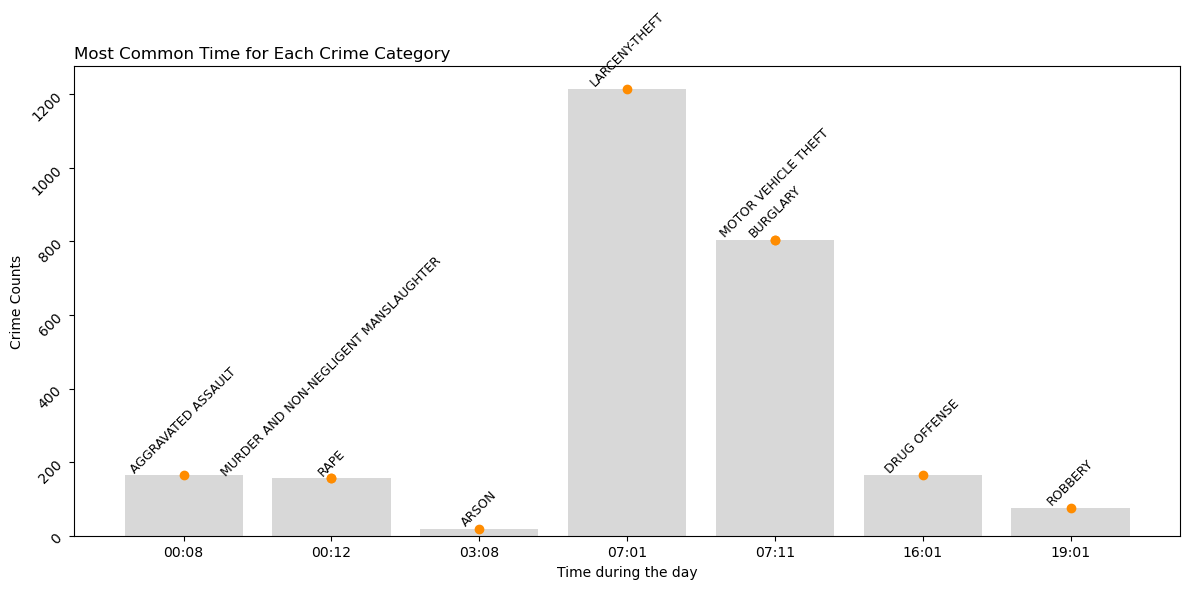

The most common time for crimes to occur is 1215 with 1215 total occurrences.


In [63]:
crime_time_1=crime_data.groupby(['UCR CRIME CATEGORY','OCCURRED TO']).size().reset_index(name='Count')
#Most common time for each type of crime
most_commmon_times_1 = crime_time_1.loc[crime_time_1.groupby('UCR CRIME CATEGORY')['Count'].idxmax()]
most_commmon_times_1 = most_commmon_times_1.reset_index(drop=True)

# Convert 'OCCURRED TO' from string to datetime format
most_commmon_times_1['OCCURRED TO'] = pd.to_datetime(most_commmon_times_1['OCCURRED TO'], format='%H:%M')
most_commmon_times_1['Time'] = most_commmon_times_1['OCCURRED TO'].dt.strftime('%H:%M')


# Calculate total counts for each time
time_counts_1 = most_commmon_times_1.groupby('Time')['Count'].sum()

# Plotting
plt.figure(figsize=(12, 6))

# Bar plot for counts
bars = plt.bar(time_counts_1.index, time_counts_1.values, alpha=0.3, color='gray', label='Crime Counts')

# Scatter points on top of the bars for most common times
for i, row in most_commmon_times_1.iterrows():
    plt.scatter(row['Time'], time_counts_1[row['Time']], color='darkorange', zorder=5)
    plt.text(row['Time'], time_counts_1[row['Time']] + 0.5, row['UCR CRIME CATEGORY'], fontsize=9, ha='center', va='bottom', rotation=45)

# Labels & Formatting
time_labels = sorted(time_counts_1.index)
plt.xticks(ticks=range(len(time_counts_1.index)), labels=time_counts_1.index)
plt.yticks(rotation=45, ha='right')
plt.xlabel('Time during the day')
plt.ylabel('Crime Counts')
plt.title('Most Common Time for Each Crime Category', loc='left')

# Adjust layout to prevent clipping
plt.tight_layout()
plt.savefig('./Resources/image-output/Crime_type_during_the_day.png')  
plt.show()

# Print the most common time again if needed
most_commmon_times_1 = time_counts_1.idxmax()  # Time with the max
most_common_time_count_1 = time_counts_1.max()  # Sum of counts for that time
print(f"The most common time for crimes to occur is {most_common_time_count_1} with {most_common_time_count_1} total occurrences.")

In [60]:
#
zip_crime_counts = crime_data['ZIP'].value_counts().head(10)

# Create a new dataframe with the top 10 ZIP codes with the most crimes
top_10_zip_crimes = pd.DataFrame({'ZIP': zip_crime_counts.index, 'Crime Count': zip_crime_counts.values})

# Display the new dataframe
top_10_zip_crimes

,ZIP,Crime Count
0,85015,17250
1,85041,15956
2,85009,15750
3,85008,15519
4,85051,15479
5,85017,13470
6,85021,13159
7,85043,13048
8,85035,12802
9,85029,11736


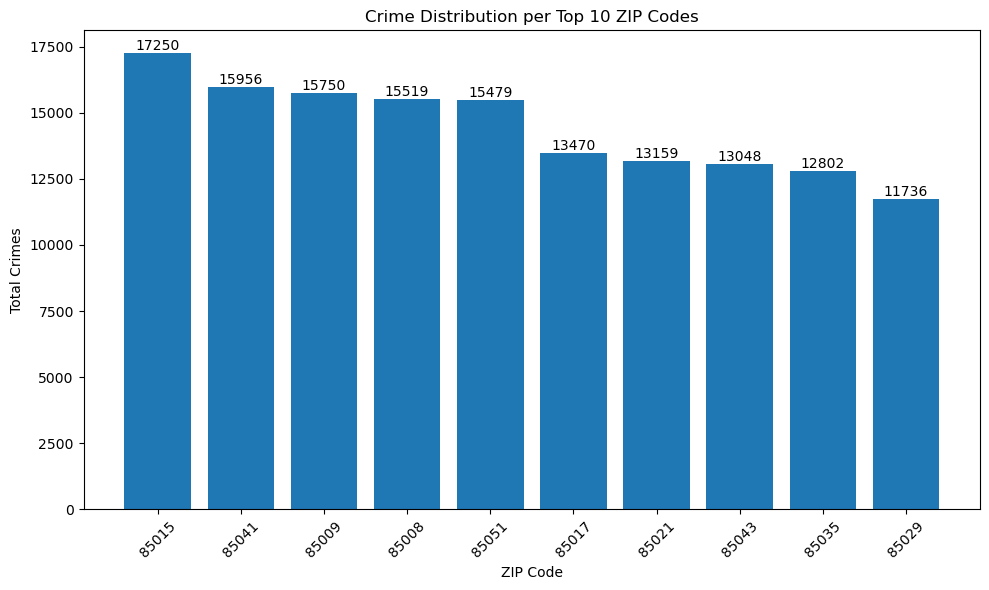

In [61]:
# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(top_10_zip_crimes['ZIP'].astype(str), top_10_zip_crimes['Crime Count'])

# Add the total at the top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')  

# Update layout
plt.title('Crime Distribution per Top 10 ZIP Codes')
plt.xlabel('ZIP Code')
plt.ylabel('Total Crimes')
plt.xticks(rotation=45)

# Adjust layout to ensure everything fits
plt.tight_layout()

# Save the figure
save_path = './Resources/image-output/crime_distribution_per_top10.png'
plt.savefig(save_path)

# Show the plot
plt.show()


In [62]:
# Filter the data to include only the top 10 ZIP codes
top_10_zips = top_10_zip_crimes['ZIP'].tolist()
filtered_crime_data = crime_data[crime_data['ZIP'].isin(top_10_zips)]

# Group the data by ZIP and UCR CRIME CATEGORY and count the occurrences
crime_counts_by_zip = filtered_crime_data.groupby(['ZIP', 'UCR CRIME CATEGORY']).size().reset_index(name='Crime Count')

# Create a line chart using Plotly
fig = px.line(crime_counts_by_zip, x='UCR CRIME CATEGORY', y='Crime Count', color='ZIP', title='Types of Crimes per Top 10 ZIP Codes')
fig.update_layout(xaxis_title='Crime Category', yaxis_title='Number of Crimes')
fig.update_traces(mode='lines+markers')

# Save the figure

%pip install kaleido
save_path = './Resources/image-output/crime_types_per_top10.png'
fig.write_image(save_path, engine='kaleido')

# Show the plot
fig.show()

Note: you may need to restart the kernel to use updated packages.
